# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [10]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [12]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [13]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
    data_train1 = resize_images(data_train,(20,20))
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

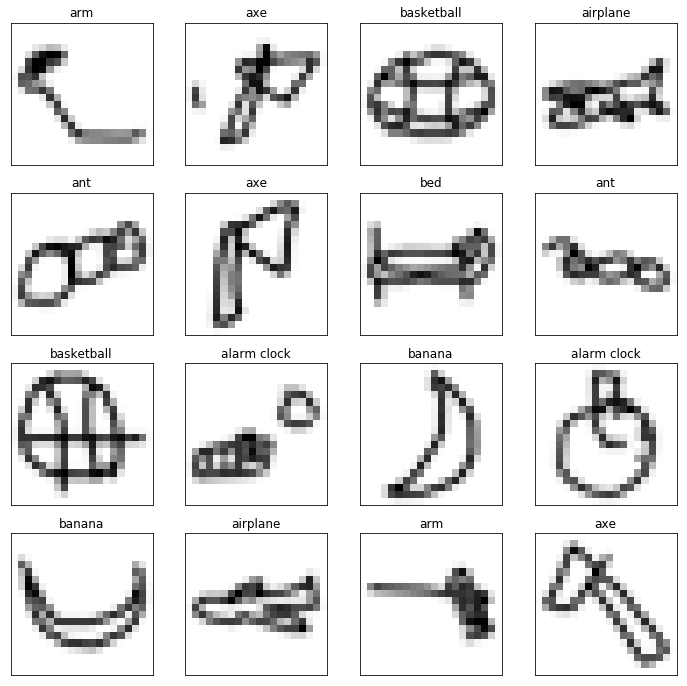

In [14]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train1.shape[0])
    plt.imshow(data_train1[ind,:].reshape((20,20)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [15]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [16]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train1.shape[1]))
#model.add(Dense(256, activation='relu'))
# you can add more Dense layers here
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train1, label_train, epochs=500, batch_size=32)

Epoch 1/500
100000/100000 [==============================] - 5s 50us/step - loss: 3.3634 - accuracy: 0.6463
Epoch 2/500
100000/100000 [==============================] - 5s 46us/step - loss: 1.2374 - accuracy: 0.7241
Epoch 3/500
100000/100000 [==============================] - 5s 46us/step - loss: 1.2424 - accuracy: 0.7330
Epoch 4/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.2717 - accuracy: 0.7365
Epoch 5/500
100000/100000 [==============================] - 5s 49us/step - loss: 1.2746 - accuracy: 0.7389
Epoch 6/500
100000/100000 [==============================] - 5s 48us/step - loss: 1.2842 - accuracy: 0.7421
Epoch 7/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.2903 - accuracy: 0.7434
Epoch 8/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.2970 - accuracy: 0.7431
Epoch 9/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.2906 - accuracy: 0.7476
Epoch 10/500
100000/100000 [

100000/100000 [==============================] - 6s 59us/step - loss: 1.1824 - accuracy: 0.7571
Epoch 77/500
100000/100000 [==============================] - 6s 58us/step - loss: 1.1695 - accuracy: 0.7573
Epoch 78/500
100000/100000 [==============================] - 6s 57us/step - loss: 1.1639 - accuracy: 0.7547
Epoch 79/500
100000/100000 [==============================] - 6s 57us/step - loss: 1.1721 - accuracy: 0.7559
Epoch 80/500
100000/100000 [==============================] - 6s 58us/step - loss: 1.1517 - accuracy: 0.7564
Epoch 81/500
100000/100000 [==============================] - 6s 65us/step - loss: 1.1594 - accuracy: 0.7563
Epoch 82/500
100000/100000 [==============================] - 7s 66us/step - loss: 1.1682 - accuracy: 0.7559
Epoch 83/500
100000/100000 [==============================] - 6s 64us/step - loss: 1.1712 - accuracy: 0.7565
Epoch 84/500
100000/100000 [==============================] - 6s 57us/step - loss: 1.1623 - accuracy: 0.7566
Epoch 85/500
100000/100000 [====

100000/100000 [==============================] - 7s 74us/step - loss: 1.1162 - accuracy: 0.7449
Epoch 151/500
100000/100000 [==============================] - 8s 75us/step - loss: 1.1139 - accuracy: 0.7428
Epoch 152/500
100000/100000 [==============================] - 6s 63us/step - loss: 1.0877 - accuracy: 0.7439
Epoch 153/500
100000/100000 [==============================] - 7s 68us/step - loss: 1.0982 - accuracy: 0.7444
Epoch 154/500
100000/100000 [==============================] - 7s 67us/step - loss: 1.0980 - accuracy: 0.7445
Epoch 155/500
100000/100000 [==============================] - 7s 68us/step - loss: 1.1076 - accuracy: 0.7441
Epoch 156/500
100000/100000 [==============================] - 7s 68us/step - loss: 1.1090 - accuracy: 0.7445
Epoch 157/500
100000/100000 [==============================] - 8s 77us/step - loss: 1.0988 - accuracy: 0.7447
Epoch 158/500
100000/100000 [==============================] - 8s 79us/step - loss: 1.1056 - accuracy: 0.7450
Epoch 159/500
100000/100

100000/100000 [==============================] - 5s 49us/step - loss: 1.0673 - accuracy: 0.7428
Epoch 225/500
100000/100000 [==============================] - 5s 49us/step - loss: 1.0777 - accuracy: 0.7436
Epoch 226/500
100000/100000 [==============================] - 5s 51us/step - loss: 1.0772 - accuracy: 0.7423
Epoch 227/500
100000/100000 [==============================] - 5s 53us/step - loss: 1.0741 - accuracy: 0.7419
Epoch 228/500
100000/100000 [==============================] - 5s 54us/step - loss: 1.0720 - accuracy: 0.7443
Epoch 229/500
100000/100000 [==============================] - 5s 55us/step - loss: 1.0575 - accuracy: 0.7438
Epoch 230/500
100000/100000 [==============================] - 6s 57us/step - loss: 1.0577 - accuracy: 0.7431
Epoch 231/500
100000/100000 [==============================] - 6s 59us/step - loss: 1.0718 - accuracy: 0.7428
Epoch 232/500
100000/100000 [==============================] - 7s 67us/step - loss: 1.0703 - accuracy: 0.7434
Epoch 233/500
100000/100

100000/100000 [==============================] - 5s 50us/step - loss: 1.0454 - accuracy: 0.7449
Epoch 299/500
100000/100000 [==============================] - 5s 49us/step - loss: 1.0359 - accuracy: 0.7449
Epoch 300/500
100000/100000 [==============================] - 5s 48us/step - loss: 1.0224 - accuracy: 0.7445
Epoch 301/500
100000/100000 [==============================] - 5s 49us/step - loss: 1.0416 - accuracy: 0.7441
Epoch 302/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.0300 - accuracy: 0.7438
Epoch 303/500
100000/100000 [==============================] - 5s 51us/step - loss: 1.0368 - accuracy: 0.7445
Epoch 304/500
100000/100000 [==============================] - 5s 52us/step - loss: 1.0205 - accuracy: 0.7443
Epoch 305/500
100000/100000 [==============================] - 6s 55us/step - loss: 1.0252 - accuracy: 0.7445
Epoch 306/500
100000/100000 [==============================] - 6s 56us/step - loss: 1.0263 - accuracy: 0.7448
Epoch 307/500
100000/100

100000/100000 [==============================] - 4s 42us/step - loss: 1.0192 - accuracy: 0.7421
Epoch 373/500
100000/100000 [==============================] - 4s 44us/step - loss: 1.0310 - accuracy: 0.7411
Epoch 374/500
100000/100000 [==============================] - 4s 44us/step - loss: 1.0235 - accuracy: 0.7410
Epoch 375/500
100000/100000 [==============================] - 4s 44us/step - loss: 1.0317 - accuracy: 0.7431
Epoch 376/500
100000/100000 [==============================] - 4s 44us/step - loss: 1.0296 - accuracy: 0.7423
Epoch 377/500
100000/100000 [==============================] - 4s 44us/step - loss: 1.0254 - accuracy: 0.7434
Epoch 378/500
100000/100000 [==============================] - 4s 43us/step - loss: 1.0272 - accuracy: 0.7414
Epoch 379/500
100000/100000 [==============================] - 4s 43us/step - loss: 1.0301 - accuracy: 0.7420
Epoch 380/500
100000/100000 [==============================] - 4s 43us/step - loss: 1.0285 - accuracy: 0.7419
Epoch 381/500
100000/100

100000/100000 [==============================] - 3s 32us/step - loss: 1.0068 - accuracy: 0.7403
Epoch 447/500
100000/100000 [==============================] - 3s 32us/step - loss: 1.0213 - accuracy: 0.7412
Epoch 448/500
100000/100000 [==============================] - 3s 31us/step - loss: 1.0195 - accuracy: 0.7413
Epoch 449/500
100000/100000 [==============================] - 3s 33us/step - loss: 1.0167 - accuracy: 0.7413
Epoch 450/500
100000/100000 [==============================] - 3s 33us/step - loss: 1.0176 - accuracy: 0.7406
Epoch 451/500
100000/100000 [==============================] - 3s 34us/step - loss: 1.0046 - accuracy: 0.7406
Epoch 452/500
100000/100000 [==============================] - 4s 35us/step - loss: 1.0109 - accuracy: 0.7413
Epoch 453/500
100000/100000 [==============================] - 4s 36us/step - loss: 1.0098 - accuracy: 0.7411
Epoch 454/500
100000/100000 [==============================] - 4s 38us/step - loss: 1.0074 - accuracy: 0.7412
Epoch 455/500
100000/100

In [ ]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')